In [1]:
from glob import glob
import datetime as dt
import nexradaws
import pyart
import cmweather
from matplotlib import pyplot as plt

import pyxlma.lmalib.io.read as lma_read
from pyxlma.plot.xlma_base_plot import BlankPlot
from pyxlma.plot.xlma_plot_feature import plot_points
from pyxlma.lmalib.lma_intercept_rhi import find_lma_points_near_rhi


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
lma_ds, start_time = lma_read.dataset(glob('./data/*.dat.gz'))
end_time = start_time+dt.timedelta(minutes=1)
conn = nexradaws.NexradAwsInterface()
scans = conn.get_avail_scans_in_range(start_time - dt.timedelta(minutes=3), start_time + dt.timedelta(minutes=2), 'KLBB')
res = conn.download(scans, '.')
radar = res.success[0].open_pyart()

Downloaded KLBB20231224_005439_V06
1 out of 1 files downloaded...0 errors


 Text(0.25, 0.1, '21084 src'),
 <BarContainer object of 80 artists>]

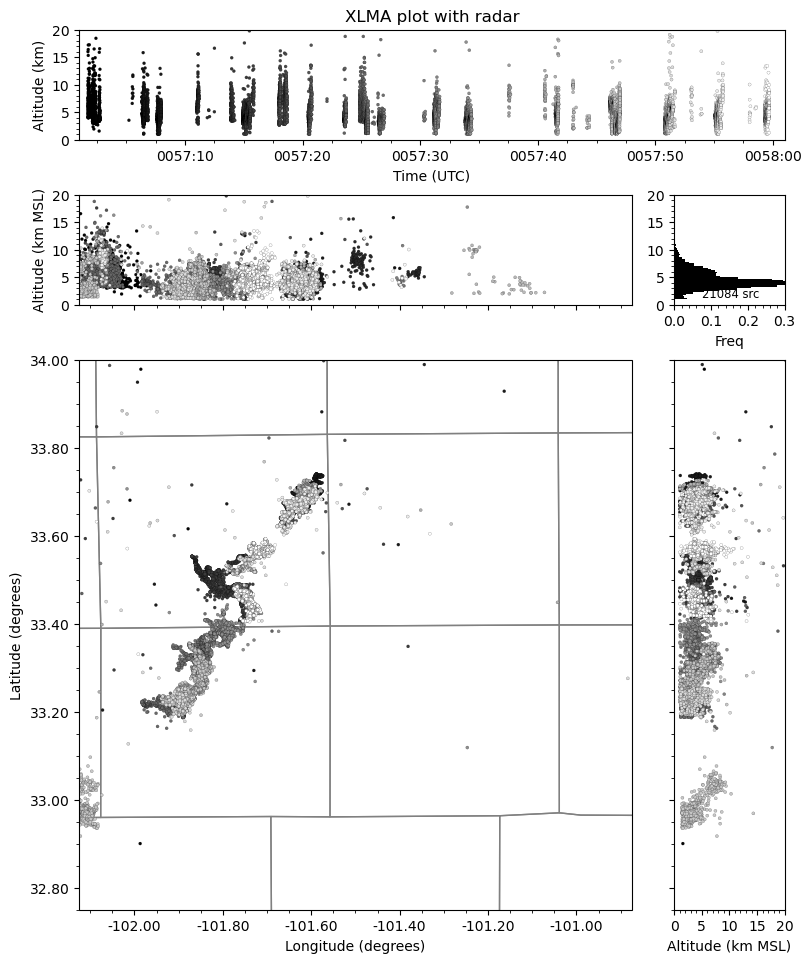

In [3]:
bk_plot = BlankPlot(start_time, xlim=[-102.125, -100.875], ylim=[32.75, 34], zlim=[0, 20], tlim=[start_time, end_time], title='XLMA plot with radar', bkgmap=True)
plot_points(bk_plot, lma_ds.event_longitude, lma_ds.event_latitude, lma_ds.event_altitude/1000,
            lma_ds.event_time, c=lma_ds.event_time, cmap='gray', edge_color='k', edge_width=0.1, s=5, zorder=2)

/var/folders/sp/1j_lh9313dg42jrzhsfb4mk40000gn/T/ipykernel_769/2052831775.py:4: UserWarning: Adding colorbar to a different Figure <Figure size 850x1100 with 6 Axes> than <Figure size 640x480 with 0 Axes> which fig.colorbar is called on.
  cb = plt.colorbar(rmd.plots[0], cax=cbax, orientation='horizontal', label='Reflectivity (dBZ)')


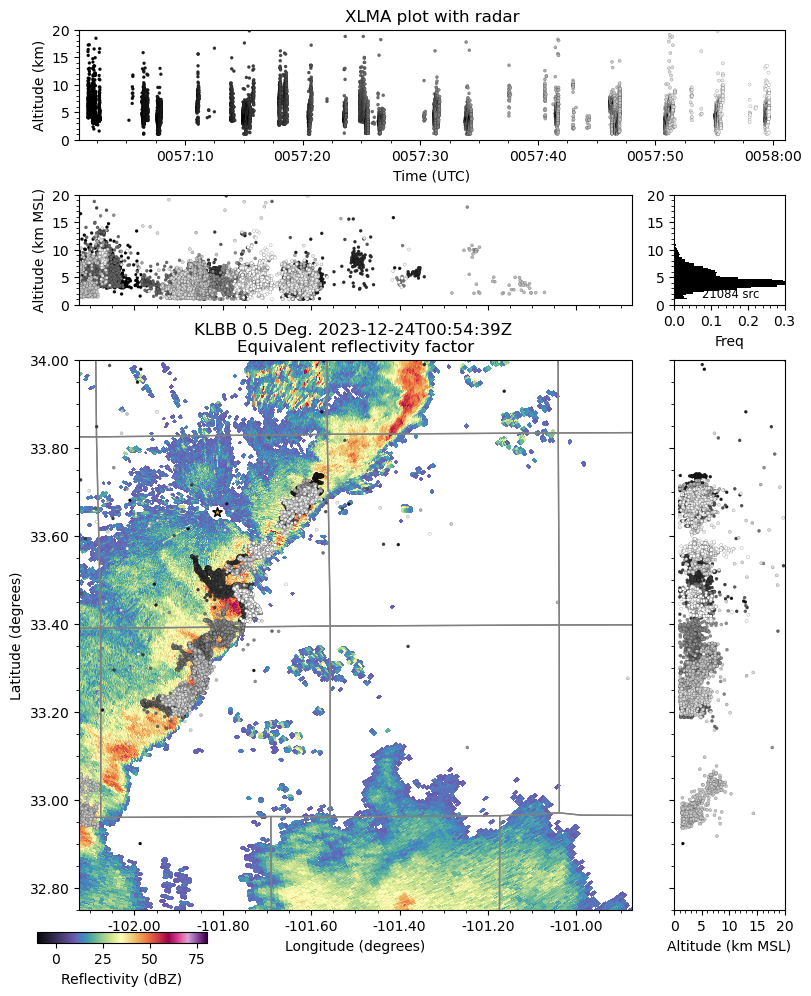

<Figure size 640x480 with 0 Axes>

In [4]:
rmd = pyart.graph.RadarMapDisplay(radar)
ref_handle = rmd.plot_ppi_map('reflectivity', vmin=-10, vmax=80, cmap='ChaseSpectral', mask_tuple=('reflectivity', 10), ax=bk_plot.ax_plan, colorbar_flag=False, embellish=False, add_grid_lines=False, zorder=1)
cbax = bk_plot.fig.add_axes([0.05, 0.07, 0.2, 0.01])
cb = plt.colorbar(rmd.plots[0], cax=cbax, orientation='horizontal', label='Reflectivity (dBZ)')
bk_plot.ax_plan.scatter(radar.longitude['data'], radar.latitude['data'], c='goldenrod', s=50, linewidths=1, edgecolors='k', marker='*', zorder=1)
bk_plot.fig

(0.0, 20.0)

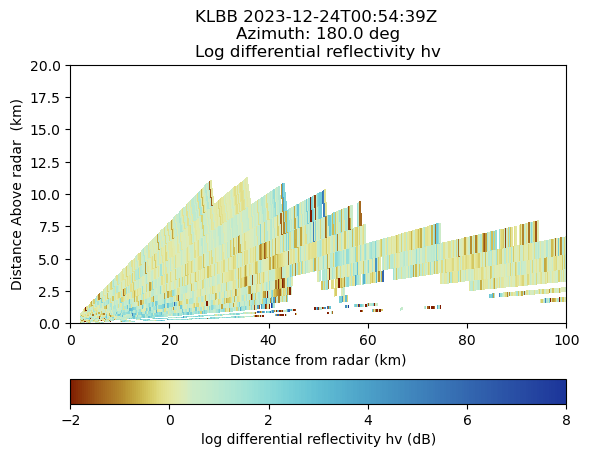

In [5]:
azimuth_to_cross_sect = 180
cross_sect_fig, cross_sect_ax = plt.subplots(1, 1)
rmd.plot_azimuth_to_rhi('differential_reflectivity', azimuth_to_cross_sect, vmin=-2, vmax=8, cmap='CM_rhohv', ax=cross_sect_ax, colorbar_orient='horizontal')
cross_sect_ax.set_xlim(0, 100)
cross_sect_ax.set_ylim(0, 20)

In [6]:
radar_time = pyart.util.datetime_from_radar(radar)
event_range, event_distance, event_altitude, mask = find_lma_points_near_rhi(lma_ds, radar.latitude['data'][0], radar.longitude['data'][0], radar.altitude['data'][0],
                                                                       azimuth_to_cross_sect, radar_time, distance_threshold=3200, time_threshold=9999)

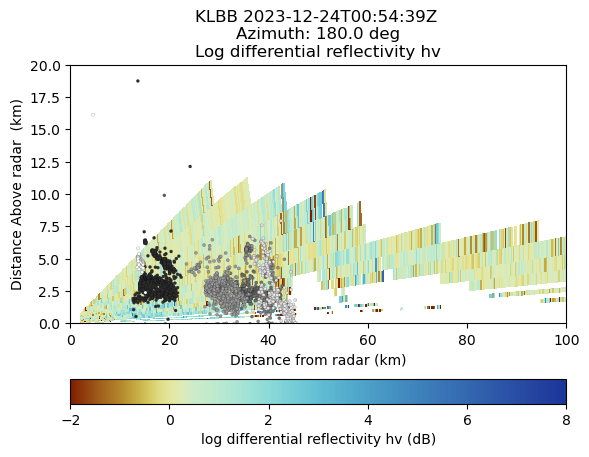

In [7]:
cross_sect_ax.scatter(event_range/1000, event_altitude/1000, c=lma_ds.event_time[mask], cmap='gray', edgecolor='k', linewidth=0.1, s=5)
cross_sect_fig